## Assignment 4 - Ronald Garcia

This assignment asks you to use resources at hand to apply module 6 - Linear Regression to several sets of data.

## Learning Outcomes

- Exploratory analysis for regression
- Understand difference between linear and non-linear models
- Carry out OLS regression model
- Evaluate model


**Question 1**

* For each data set in Assignment4_linear_regression_data.xlsx:

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

* If the relation is not linear, transform the data accordingly. 
 - Try logarithm, exponential, square root, square, etc., for X and/or Y until you see a linear relation.  You only need to report what is the transformation chosen, not all the attempts. 
 Note:  most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations.  A generic way we did not cover is to use a Box-Cox transformation. 
 
* Create an OLS model for the original and transformed data if required. 
 - Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate. 

 - Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
 - If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)


The output of the assignment should be: 

- OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

- A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

- An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.).  If the model is not linear, you need to transform the equation back to its original form.  

Check out the following if you need further guidance:
http://www.bzst.com/2009/09/interpreting-log-transformed-variables.html

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/

https://stats.stackexchange.com/questions/266722/interpretation-of-linear-regression-results-where-dependent-variable-is-transfor

- If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outlier.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot

In [2]:
#let's read the provided Excel file with data sets
df_1 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 1')
df_2 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 2')
df_3 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 3')
df_4 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 4')
df_5 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 5')
df_6 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 6')

## Data Set 1

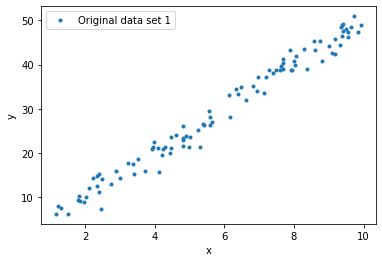

In [3]:
#Let's plot the data set 1
plt.plot(df_1.x, df_1.y, 'o', label='Original data set 1',markersize=3)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
#Initialize the regression model for the data set 1
model_1 = sm.ols('y ~ x', data = df_1)
# Fit the regression model
model_1 = model_1.fit()
# Let's take a look at the regression parameters
model_1.params

Intercept    0.238070
x            4.984259
dtype: float64

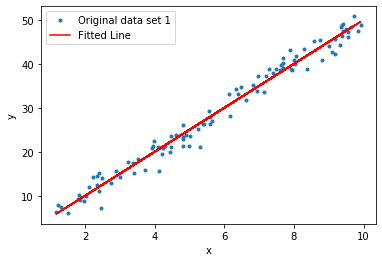

In [5]:
#let's plot the regression line along the original data set 1
plt.plot(df_1.x, 
         df_1.y, 'o', 
         label='Original data set 1', 
         markersize=3)

# Extract regression parameters from the model
intercept, slope = model_1.params

# Predict y
df_1['y_predicted'] = intercept + slope * df_1.x
# Add regression line
plt.plot(df_1.x, df_1.y_predicted , 'r-', label='Fitted Line')
# Add legend, set x, y axes labels and show the figure
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [6]:
#We can see that the regression line goes approximately through the center of the points. Based on the graphic the data is
#following a linear regression. I do not see any outliers

count    1.000000e+02
mean     5.782042e-15
std      1.908727e+00
min     -3.763343e+00
25%     -1.472735e+00
50%     -2.630865e-01
75%      1.133296e+00
max      5.254912e+00
Name: y_residuals, dtype: float64

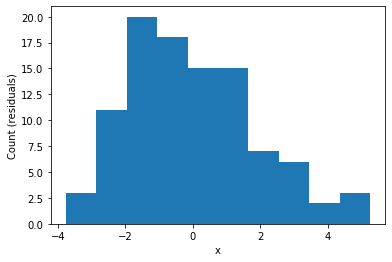

In [7]:
#I do not see outliers in this dataset but let's double check using residual distrubution
# Calculate the residuals
df_1['y_residuals'] = df_1['y_predicted'] - df_1['y']

# We will plot the histogram of the residuals first
residuals_hist = plt.hist(df_1.y_residuals)
plt.xlabel('x')
plt.ylabel('Count (residuals)')

#let's see also the statistical summary of the residuals
df_1['y_residuals'].describe()

In [8]:
#Residuals distribution looks normal.
#let's see how good are our predictions for the data set 1 --> R2
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           4.47e-84
Time:                        22:27:55   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
x              4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#As we can see with the obtained R2, x can explain approximately 98% of the total variance of y. 
#we can also notice that the P value for the intercept is larger than 0.05 so we could easily drop the intercept. We can 
#also see that the Kurtosis is very closed to 3 which indicates a normalized residual distribution, the histogram 
#of the residuals also shows this.

## Data Set 2

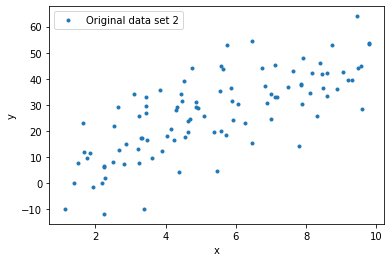

In [10]:
#Let's plot the data set 2
plt.plot(df_2.x, df_2.y, 'o', label='Original data set 2',markersize=3)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
#Initialize the regression model for the data set 1
model_2 = sm.ols('y ~ x', data = df_2).fit()
model_2.params

Intercept    1.095552
x            4.777354
dtype: float64

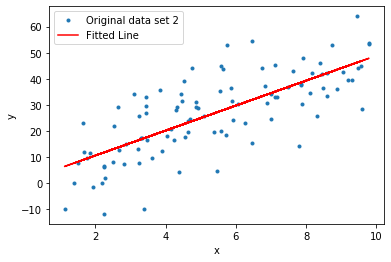

In [12]:
#let's plot the regression line along the original data set 2
plt.plot(df_2.x, 
         df_2.y, 'o', 
         label='Original data set 2', 
         markersize=3)
intercept, slope = model_2.params
df_2['y_predicted'] = intercept + slope * df_2.x
plt.plot(df_2.x, df_2.y_predicted , 'r-', label='Fitted Line')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()

count    1.000000e+02
mean    -1.332268e-14
std      1.041688e+01
min     -2.427189e+01
25%     -6.825796e+00
50%      3.255999e-01
75%      6.370633e+00
max      2.713100e+01
Name: y_residuals, dtype: float64

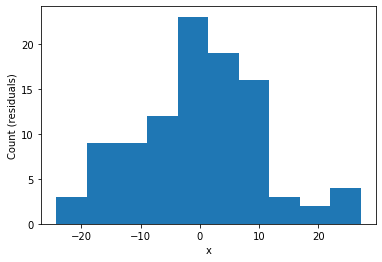

In [13]:
#We can observe that the dataset shows linearity - No transformation is needed. I do not see outliers in this dataset
#but let's check a residual distrubution
# Calculate the residuals
df_2['y_residuals'] = df_2['y_predicted'] - df_2['y']

# We will plot the histogram of the residuals first
residuals_hist = plt.hist(df_2.y_residuals)
plt.xlabel('x')
plt.ylabel('Count (residuals)')

#let's check also the statistical summary of the residuals
df_2['y_residuals'].describe()

In [14]:
#The residual distribution looks normal with constant variability 
#let's see our model summary for the data set 2
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           6.11e-19
Time:                        22:27:56   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.668      -3.958       6.149
x              4.7774      0.432     11.062      0.000       3.920       5.634
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.079
Skew:                          -0.065   Prob(JB):                        0.961
Kurtosis:                       3.045   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#Kurtosis is 3 which tell us that residuals are normalized. P-value for the intercept is 0.668 which is larger than 0.05, 
#thus we consider dropping the intercept. 

## Data Set 3

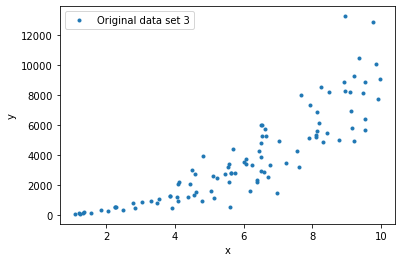

In [16]:
#Let's plot the data set 3
plt.plot(df_3.x, df_3.Y, 'o', label='Original data set 3',markersize=3)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [17]:
#As we can see in the plot, the data set is non-linear and needs to be transformed

In [18]:
#let's build a linear model to record R2 before transforming 
model_3_before_transform = sm.ols('Y ~ x', data = df_3).fit()
model_3_before_transform.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     302.4
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.04e-31
Time:                        22:27:56   Log-Likelihood:                -873.07
No. Observations:                 100   AIC:                             1750.
Df Residuals:                      98   BIC:                             1755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.1748    402.741     -6.546      0.000   -3435.400   -1836.949
x           1081.8266     62.216     17.388      0.000     958.361    1205.292
==============================================================================
Omnibus:                       21.170   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.896
Skew:                           0.863   Prob(JB):                     5.90e-09
Kurtosis:                       5.474   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#let's use np.sqrt for transforming y
df_3['y_trans'] = np.sqrt(df_3['Y'])

In [20]:
#Initialize the regression model for the transformed data - data set 3
model_3_after_transform = sm.ols('y_trans ~ x', data = df_3).fit()
model_3_after_transform.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_trans   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     588.0
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           3.37e-43
Time:                        22:27:56   Log-Likelihood:                -369.26
No. Observations:                 100   AIC:                             742.5
Df Residuals:                      98   BIC:                             747.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2001      2.612     -0.842      0.402      -7.384       2.984
x              9.7861      0.404     24.249      0.000       8.985      10.587
==============================================================================
Omnibus:                        2.926   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                2.648
Skew:                          -0.150   Prob(JB):                        0.266
Kurtosis:                       3.739   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

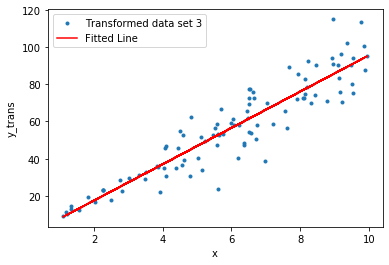

In [21]:
#let's plot the regression line along the transformed data set 3
plt.plot(df_3.x,
         df_3.y_trans, 'o', 
         label='Transformed data set 3', 
         markersize=3)
intercept, slope = model_3_after_transform.params
df_3['y_predicted_trans'] = intercept + slope * df_3.x
plt.plot(df_3.x, df_3.y_predicted_trans , 'r-', label='Fitted Line')
plt.legend()
plt.ylabel('y_trans')
plt.xlabel('x')
plt.show()

In [22]:
#we can observed linearity using y_trans and the R2 increases after applying the transformation
#R-squared:	0.755 (Original) vs R-squared:	0.857 (Transformed)
#let's check for outliers
df_3['y_residuals_trans'] = df_3['y_predicted_trans'] - df_3['y_trans']

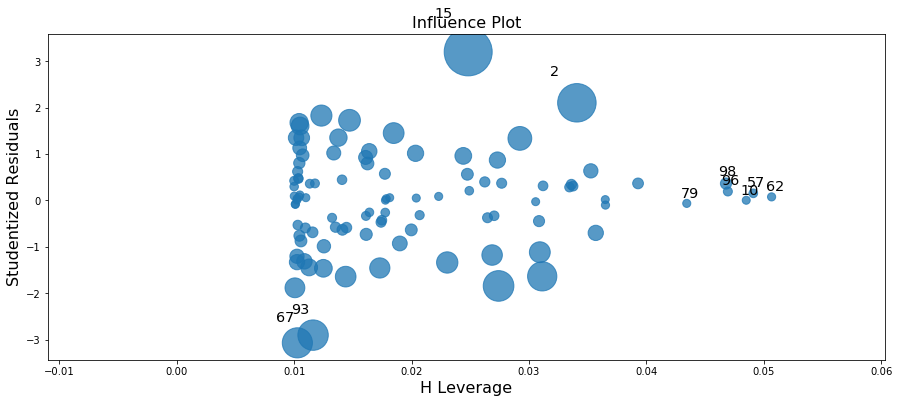

In [23]:
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(model_3_after_transform, ax=ax)

In [24]:
#It seems like there are two points with high leverage and high residuals. Point 2 and 15, 
#I am using a leverage more than 0.02 as a criterion

In [25]:
#let's remove outliers (point 15 and 2) and create a new model, then I would like to compare the model (R2) after 
#removing outliers with the model before remogin outliers, i.e., model_3_after_transform 
df_3_without_outliers = df_3.drop([df_3.index[2] , df_3.index[15]])

In [26]:
#Initialize the regression model for the transformed data withour outliers - data set 3
model_3_after_transform_no_outliers = sm.ols('y_trans ~ x', data = df_3_without_outliers).fit()
model_3_after_transform_no_outliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_trans   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     607.6
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           2.63e-43
Time:                        22:27:56   Log-Likelihood:                -355.29
No. Observations:                  98   AIC:                             714.6
Df Residuals:                      96   BIC:                             719.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9671      2.465     -0.392      0.696      -5.860       3.926
x              9.4928      0.385     24.649      0.000       8.728      10.257
==============================================================================
Omnibus:                        4.190   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                3.496
Skew:                          -0.408   Prob(JB):                        0.174
Kurtosis:                       3.436   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#Our R2 after transforming the data and before removing the outliers was R-squared:	0.857 vs our new R-squared:	0.864.
#there is a slight improvement in R-squared. 
#Let's review the coefficients (intercept and slope)
#For both models, before and after, the intercept is questionable so we could drop the intercept in both models
#There is a change in the slopes:
#x	9.7861	0.404 (after transforming before removing outliers) 
#vs  
#x	9.4928	0.385 (after transforming after removing outliers) - We can observe an smaller the std err 
#It seems like we can improve the model by removing the outliers

## Data Set 4

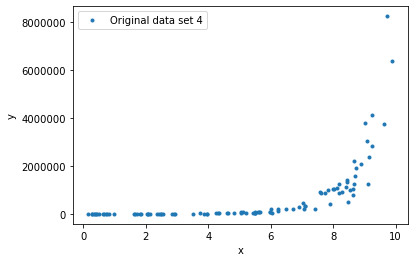

In [28]:
#Let's plot the data set 4
plt.plot(df_4.x, df_4.Y, 'o', label='Original data set 4',markersize=3)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [29]:
#As we can see in the plot, the data set is non-linear and needs to be transformed. Let's use logarithm to transform it
df_4['y_trans'] = np.log(df_4['Y'])

In [30]:
#Initialize the regression model for the transformed data - data set 4
model_4_after_transform = sm.ols('y_trans ~ x', data = df_4).fit()
model_4_after_transform.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_trans   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           6.91e-89
Time:                        22:27:56   Log-Likelihood:                -46.034
No. Observations:                 100   AIC:                             96.07
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6647      0.078     72.264      0.000       5.509       5.820
x              0.9898      0.013     75.930      0.000       0.964       1.016
==============================================================================
Omnibus:                        7.020   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.256
Skew:                          -0.657   Prob(JB):                       0.0266
Kurtosis:                       2.872   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

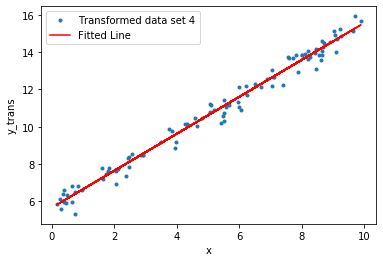

In [31]:
#Just to highlight the p-value for the intercept is 0.000 and therefore we keep the intercept
#let's plot the regression line along the transformed data set 4
plt.plot(df_4.x,
         df_4.y_trans, 'o', 
         label='Transformed data set 4', 
         markersize=3)
intercept, slope = model_4_after_transform.params
df_4['y_predicted_trans'] = intercept + slope * df_4.x
plt.plot(df_4.x, df_4.y_predicted_trans , 'r-', label='Fitted Line')
plt.legend()
plt.ylabel('y_trans')
plt.xlabel('x')
plt.show()

In [32]:
#we definitely can observed linearity using y_trans after applying the transformation and R-squared:	0.983
#let's check for outliers
df_4['y_residuals_trans'] = df_4['y_predicted_trans'] - df_4['y_trans']

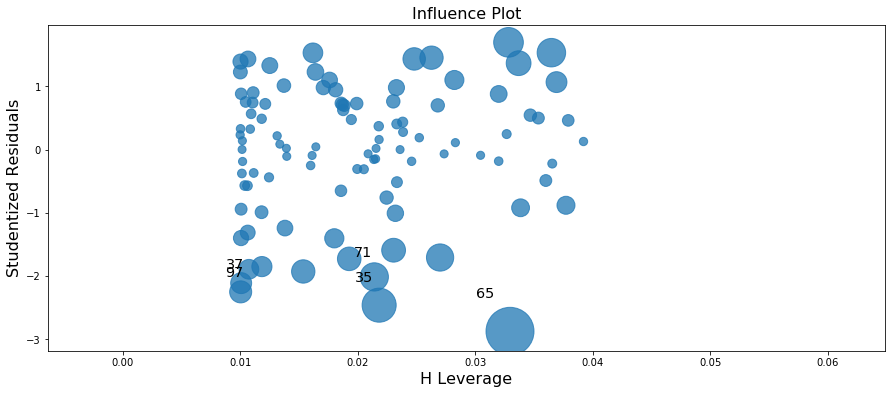

In [33]:
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(model_4_after_transform, ax=ax)

In [34]:
#It doesn't seem to be many outliers with high residuals and high leverage. Perhaps, point 65. 
df_4_without_outliers = df_4.drop(df_4.index[65])

In [35]:
#Initialize the regression model for the transformed data withour outliers - data set 3
model_4_after_transform_no_outliers = sm.ols('y_trans ~ x', data = df_4_without_outliers).fit()
model_4_after_transform_no_outliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_trans   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     5982.
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           5.65e-89
Time:                        22:27:57   Log-Likelihood:                -42.014
No. Observations:                  99   AIC:                             88.03
Df Residuals:                      97   BIC:                             93.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7048      0.077     74.184      0.000       5.552       5.857
x              0.9843      0.013     77.345      0.000       0.959       1.010
==============================================================================
Omnibus:                        5.612   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.745
Skew:                          -0.572   Prob(JB):                       0.0565
Kurtosis:                       2.710   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Our R2 after transforming the data and before removing the outliers was R-squared:	0.983 vs our new R-squared:	0.984.
#There is no sustancial change in R2. I would recommend not to remove point 65 from the model based on the results. 
#we can also notice minor changes (almost no changes) in the coefficients and std err: 
#Intercept	5.6647	0.078 (before removing outliers)
#vs 
#Intercept	5.7048	0.077 (after removing outliers)
#x	0.9898	0.013 (before removing outliers)
#vs 
#x	0.9843	0.013 (after removing outliers)
#Based on the previous analisis, there is no sustancial improvement in the model when removing outliers

## Data Set 5

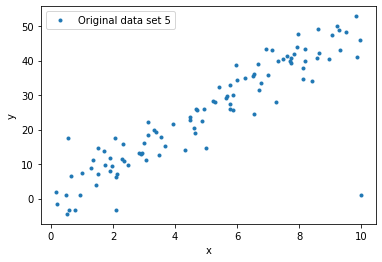

In [37]:
#Let's plot the data set 5
plt.plot(df_5.X, df_5.Y, 'o', label='Original data set 5',markersize=3)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [38]:
#Visual inspection shows us that the data set is linear. Let's do a scatter plot with fitted line to confirm
model_5 = sm.ols('Y ~ X', data = df_5).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           4.70e-37
Time:                        22:27:57   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.495      -1.749       3.591
X              4.7671      0.235     20.294      0.000       4.301       5.233
==============================================================================
Omnibus:                      113.783   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.951
Skew:                          -3.591   Prob(JB):                         0.00
Kurtosis:                      26.691   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

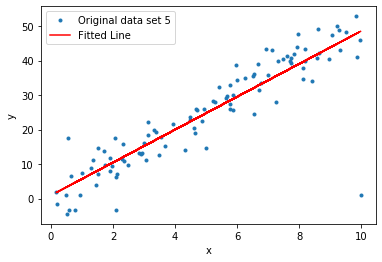

In [39]:
#let's plot the regression line along the original data set 5
plt.plot(df_5.X, 
         df_5.Y, 'o', 
         label='Original data set 5', 
         markersize=3)
intercept, slope = model_5.params
df_5['y_predicted'] = intercept + slope * df_5.X
plt.plot(df_5.X, df_5.y_predicted , 'r-', label='Fitted Line')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [40]:
#Let's see our model summary, R-squared:	0.806, and p value for the intercept is high so we could run  
#a new model without the the intercept to compare. 
#Something to notice is that the high kurtosis suggests non-normality - Kurtosis:	26.691. My understanding is that 
#kurtosis also measures outliers, let's see!

In [41]:
#let's check for outliers
df_5['y_residuals'] = df_5['y_predicted'] - df_5['Y']

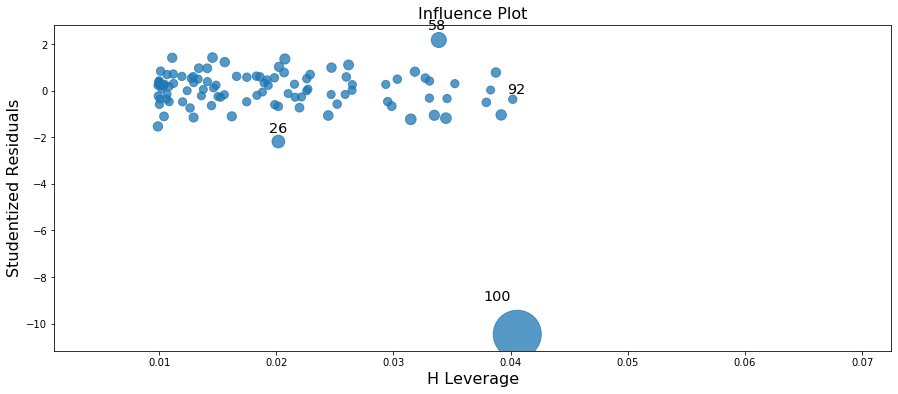

In [42]:
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(model_5, ax=ax)

In [43]:
#It seems like there are three points with high leverage and high residuals. Point 26, 58 and 100, 
#I am using a leverage more than 0.02 as a criterion
df_5_without_outliers = df_5.drop([df_5.index[26], df_5.index[58] , df_5.index[100]])

In [44]:
#Initialize the regression model for the transformed data withour outliers - data set 5
model_5_no_outliers = sm.ols('Y ~ X', data = df_5_without_outliers).fit()
model_5_no_outliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     1128.
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           7.16e-55
Time:                        22:27:57   Log-Likelihood:                -278.47
No. Observations:                  98   AIC:                             560.9
Df Residuals:                      96   BIC:                             566.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2792      0.870     -0.321      0.749      -2.005       1.447
X              5.1044      0.152     33.592      0.000       4.803       5.406
==============================================================================
Omnibus:                        1.806   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.828
Skew:                          -0.312   Prob(JB):                        0.401
Kurtosis:                       2.756   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Let's compare R2, coefficients and std err: 
#R-squared:	0.806 vs R-squared:	0.922 - There is an improvement in R2 
#We could drop the intercept in both models (before and after). P-value for the intercept is larger than 0.05
#There is an interesting change in the slope and std err
#X	4.7671	0.235 (before removing outliers)
#X	5.1044	0.152 (after removing outliers)
#There also a dramatic changes in the kurtosis from Kurtosis:	26.691 to Kurtosis:	2.756
#It seems like our model improves after removing outliers

## Data Set 6

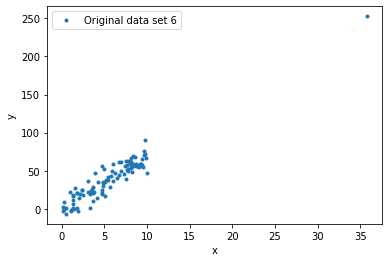

In [46]:
#Let's plot the data set 5
plt.plot(df_6.x, df_6.y, 'o', label='Original data set 6',markersize=3)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [47]:
#Visual inspection shows us that the data set is linear. Let's do a scatter plot with fitted line to confirm
model_6 = sm.ols('y ~ x', data = df_6).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           2.49e-54
Time:                        22:27:57   Log-Likelihood:                -367.52
No. Observations:                 101   AIC:                             739.0
Df Residuals:                      99   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3059      1.534     -0.199      0.842      -3.350       2.739
x              7.0272      0.218     32.259      0.000       6.595       7.459
==============================================================================
Omnibus:                        0.494   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.262
Skew:                           0.120   Prob(JB):                        0.877
Kurtosis:                       3.070   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

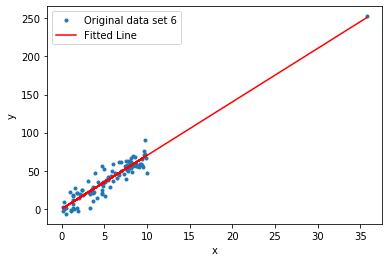

In [48]:
#let's plot the regression line along the original data set 6
plt.plot(df_6.x, 
         df_6.y, 'o', 
         label='Original data set 6', 
         markersize=3)
intercept, slope = model_6.params
df_6['y_predicted'] = intercept + slope * df_6.x
plt.plot(df_6.x, df_6.y_predicted , 'r-', label='Fitted Line')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [49]:
#It shows that dependece is linear and R-squared:	0.913. We could drop intercept based on its p-value 0.842.
#I don't see any outlier but let's confirm that
df_6['y_residuals'] = df_6['y_predicted'] - df_6['y']

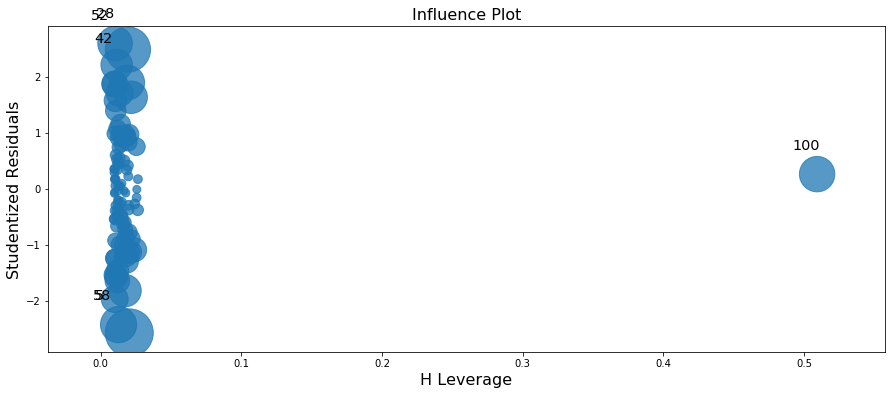

In [50]:
#Influence plot
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(model_6, ax=ax)

In [51]:
#As we can see in the influnce plot, point 100 has high leverage but almost zero residuals. I will not consider this point 
#an outlier. Kurtosis value is closed to 3 which suggests that residuals are normal 